In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

In [3]:
#path to fruits directory
PATH = r"C:\Users\h\Desktop\AI_Model\DeepLearning\fruits_sample"
categorys = ["Apple", "Avocado", "Banana", "Beetroot", "Blueberry", "Carambula"]

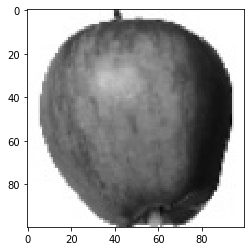

In [4]:
for categ in categorys:
    path = os.path.join(PATH, categ)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap='gray')
        plt.show()
        break
    break

In [5]:
print(np.shape(img_array))

(100, 100)


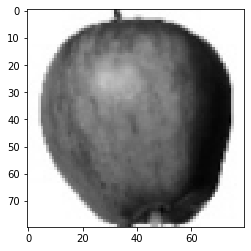

In [6]:
IMG_SIZE = 80
new_img_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE)) #changing the dimention of the fruit
plt.imshow(new_img_array, cmap='gray')

In [7]:
def create_training_data():
    training_data = []
    for categ in categorys:
        path = os.path.join(PATH, categ)   
        class_index = categorys.index(categ) # storing index of fruits for classification
        for img in os.listdir(path):               
            try:
                    img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                    new_img_array = new_img_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                    training_data.append([new_img_array, class_index])
            except Exception as e:
                pass
    return training_data


In [8]:
trainee_data=create_training_data()
print(trainee_data[1][1])

0


In [9]:
import random 
random.shuffle(trainee_data)   # after genreting the training data all fruits was in sequence like apple having index 0, Avocado 1 and so on


In [10]:
x=[]
y=[]
for features, label in trainee_data:
    x.append(features)
    y.append(label)

In [11]:
print(x[0])
print(np.shape(x[50]))

[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]
(80, 80)


In [12]:
import tensorflow as tf
x_train = np.array(tf.keras.utils.normalize(x, axis = 1))
y_train = np.array(y)
print(x_train[0])
print(np.shape(x_train))
print(np.shape(y_train))

[[0.1118034 0.1118034 0.1118034 ... 0.1118034 0.1118034 0.1118034]
 [0.1118034 0.1118034 0.1118034 ... 0.1118034 0.1118034 0.1118034]
 [0.1118034 0.1118034 0.1118034 ... 0.1118034 0.1118034 0.1118034]
 ...
 [0.1118034 0.1118034 0.1118034 ... 0.1118034 0.1118034 0.1118034]
 [0.1118034 0.1118034 0.1118034 ... 0.1118034 0.1118034 0.1118034]
 [0.1118034 0.1118034 0.1118034 ... 0.1118034 0.1118034 0.1118034]]
(943, 80, 80)
(943,)


In [13]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())  # making flat variable of 40x40 matrix
model.add(tf.keras.layers.Dense(40, activation=tf.nn.relu))  #128 number of neurons of this layer
model.add(tf.keras.layers.Dense(40, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(40, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(6, activation=tf.nn.softmax)) #output layer, Activation fn for probability distribution so softmax


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [14]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy']) # categorical_crossintropy is best for categorise more than two obect so binart loss is better for diffretiating between two things.

In [15]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
943/943 [==============================] - 1s 1ms/sample - loss: 1.4018 - acc: 0.4624
Epoch 2/5
943/943 [==============================] - 0s 204us/sample - loss: 0.5717 - acc: 0.8759
Epoch 3/5
943/943 [==============================] - 0s 191us/sample - loss: 0.2153 - acc: 0.9745
Epoch 4/5
943/943 [==============================] - 0s 178us/sample - loss: 0.0795 - acc: 1.0000
Epoch 5/5
943/943 [==============================] - 0s 161us/sample - loss: 0.0398 - acc: 0.9989


In [16]:
model.save('fruits_predictor.h5')

In [17]:
new_model = tf.keras.models.load_model('fruits_predictor.h5')

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


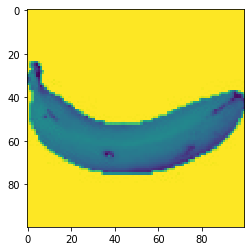

(80, 80)
(1, 80, 80)


In [18]:
path_to_apple=r'C:\Users\h\Desktop\AI_Model\DeepLearning\fruits_sample\Banana\103_100.jpg'
img_array_to_test = cv2.imread(path_to_apple, cv2.IMREAD_GRAYSCALE)
plt.imshow(img_array_to_test)
plt.show()
img_array_to_test = cv2.resize(img_array_to_test, (80, 80))
print(np.shape(img_array_to_test))
test_img_list = []
test_img_list.append(img_array_to_test)
print(np.shape(test_img_list))

test_img_list = tf.keras.utils.normalize(test_img_list, axis = 1)

In [19]:
print(np.shape(test_img_list))

(1, 80, 80)


In [22]:
def fruits_prediction(x):
    path_to_apple=x
    img_array_to_test = cv2.imread(path_to_apple, cv2.IMREAD_GRAYSCALE)
    img_array_to_test = cv2.resize(img_array_to_test, (80, 80))
    plt.imshow(img_array_to_test)
    plt.show()
    test_img_list = []
    test_img_list.append(img_array_to_test)
    test_img_list = tf.keras.utils.normalize(test_img_list, axis = 1)
    print(np.shape(test_img_list))
    #till here image pre-processing
    pre = model.predict([np.array(test_img_list)])
    print(pre)
    class_v = np.argmax(pre)
    if class_v < 6 and class_v > -1:
        print(categorys[class_v])
    else:
        print("Sorry Try somthing else!!")

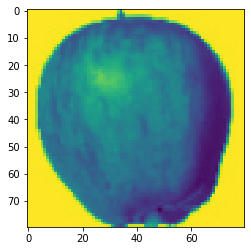

(1, 80, 80)
[[9.9307406e-01 1.7165580e-03 3.0259127e-03 1.6003063e-04 5.3298665e-04
  1.4904394e-03]]
Apple


In [23]:
fruits_prediction(r'C:\Users\h\Desktop\AI_Model\DeepLearning\fruits_sample\Apple\9_100.jpg')